# ASSIGNMENT 5

## Submitted by - 
    Raghav Aggarwal 20EC10064 (Team Leader)
    Darpan Aswal 20EC10026
    Rudransh Gupta 20EE30036
    Parv Jain 20IE10048
    Adarsh Jha 20CH30003
    Harsh Gupta 20CH10021
## Importing Libraries and Dataset

In [43]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [21]:
data = pd.read_csv('S_n_I_A_N_P_An_Io_noaa2.txt',delimiter= '\s+', index_col=False, header = None)
data.columns = {'SAM','nino', 'ISMR', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD'}

In [22]:
data

,nino,At-nino,NAO,ISMR,IOD,AMO,PDO,SAM
0,0.599257,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1,0.663879,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
2,-0.428772,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
3,0.513283,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
4,-0.260801,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719
...,...,...,...,...,...,...,...,...
865,1.147740,1.296340,23.70850,0.161498,-0.385948,0.108982,-0.079691,0.297551
866,1.579510,1.572200,-41.18450,0.174294,-0.945931,2.158290,-0.189664,0.441171
867,0.923487,2.007070,-56.14030,0.277507,0.413170,0.031796,-0.188361,0.534373
868,0.207229,2.259830,-43.77540,0.492069,-0.579453,-1.432400,0.008520,0.771095


In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,accuracy_score

In [54]:
x = np.array(data.drop(['ISMR'], axis = 1))
y = data.ISMR

## XGBoost

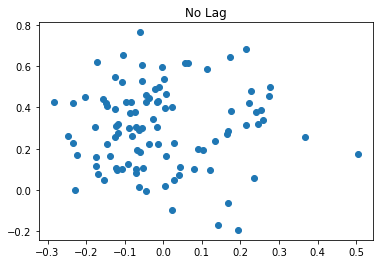

In [85]:
mserror = []
model = XGBRegressor()
model.fit(x[:-100],y[:-100])
y_pred = model.predict(x[-100:])
plt.scatter(y_pred,y[-100:])
plt.title("No Lag")
plt.show()
mserror.append(mean_squared_error(y_pred,y[-100:]))

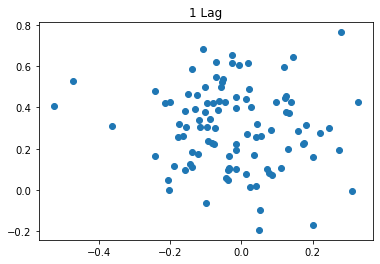

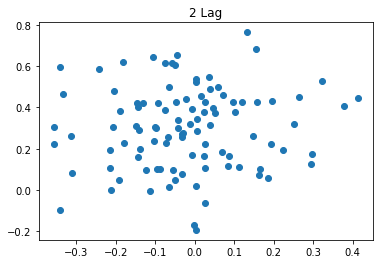

In [86]:
for lag in range(1,3):
    model = XGBRegressor()
    model.fit(x[:-100-lag],y[lag:-100])
    y_pred = model.predict(x[-100-lag:-lag])
    plt.scatter(y_pred,y[-100:])
    plt.title(str(lag)+" Lag")
    plt.show()
    mserror.append(mean_squared_error(y_pred,y[-100:]))

In [87]:
for i in range(3):
    print("Accuracy with ",i,"lag = ",mserror[i])

Accuracy with  0 lag =  0.1559297335925728
Accuracy with  1 lag =  0.1715779464728672
Accuracy with  2 lag =  0.163641420343375


## SVM

In [88]:
from sklearn.svm import SVR

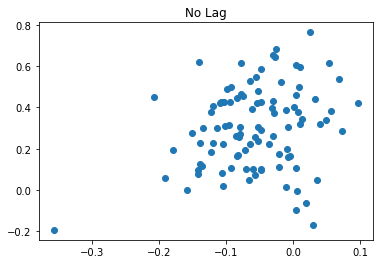

In [91]:
mserror = []
model = SVR()
model.fit(x[:-100],y[:-100])
y_pred = model.predict(x[-100:])
plt.scatter(y_pred,y[-100:])
plt.title("No Lag")
plt.show()
mserror.append(mean_squared_error(y_pred,y[-100:]))

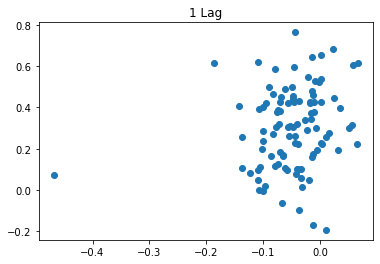

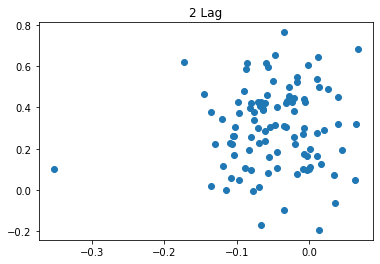

In [92]:
for lag in range(1,3):
    model = SVR()
    model.fit(x[:-100-lag],y[lag:-100])
    y_pred = model.predict(x[-100-lag:-lag])
    plt.scatter(y_pred,y[-100:])
    plt.title(str(lag)+" Lag")
    plt.show()
    mserror.append(mean_squared_error(y_pred,y[-100:]))

In [93]:
for i in range(3):
    print("Accuracy with ",i,"lag = ",mserror[i])

Accuracy with  0 lag =  0.16555593232452565
Accuracy with  1 lag =  0.16072307089239934
Accuracy with  2 lag =  0.1629951282813806


## SVM with GridSearch and different kernels

In [101]:
from sklearn.model_selection import GridSearchCV

param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid')}

modelsvr = SVR()

grids = GridSearchCV(modelsvr,param)

grids.fit(x[:-100],y[:-100])

GridSearchCV(estimator=SVR(),
             param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [105]:
grids.cv_results_

{'mean_fit_time': array([2.65654383, 0.14103985, 0.03018699, 0.03717051]),
 'std_fit_time': array([0.62284683, 0.02212157, 0.00088548, 0.00072968]),
 'mean_score_time': array([0.00694442, 0.00446467, 0.01190076, 0.00832086]),
 'std_score_time': array([0.00634688, 0.00064351, 0.00044774, 0.00012322]),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'sigmoid'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear'},
  {'kernel': 'poly'},
  {'kernel': 'rbf'},
  {'kernel': 'sigmoid'}],
 'split0_test_score': array([-4.92739072e-01, -7.92164346e-01, -8.41936099e-01, -1.40804872e+04]),
 'split1_test_score': array([-7.33576618e-01, -8.14557786e-01, -1.14204103e+00, -3.13994388e+04]),
 'split2_test_score': array([-1.75234754e-01, -2.29282813e-01, -2.01364007e-01, -1.31350379e+04]),
 'split3_test_score': array([-4.60141437e-01, -1.29934527e-01, -2.47220363e-02, -2.32875602e+04]),
 'split4_test_score': arr

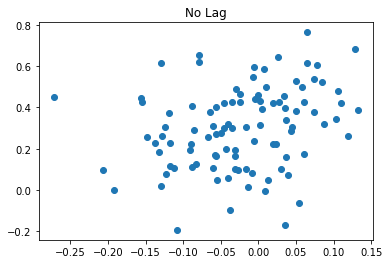

In [108]:
mserror = []
plt.scatter(grids.predict(x[-100:]),y[-100:])
plt.title("No Lag")
plt.show()
mserror.append(mean_squared_error(grids.predict(x[-100:]),y[-100:]))

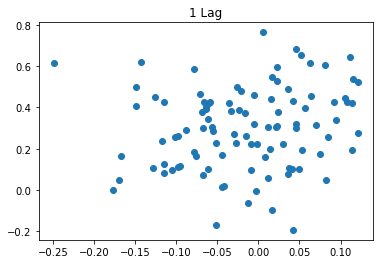

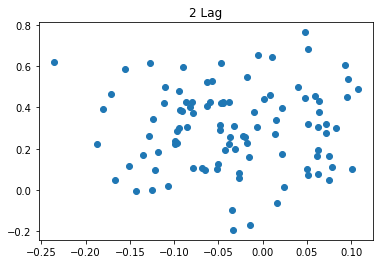

In [110]:
scores = []
for lag in range(1,3):
    param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid')}
    modelsvr = SVR()
    grids = GridSearchCV(modelsvr,param)
    grids.fit(x[:-100-lag],y[lag:-100])
    y_pred = grids.predict(x[-100-lag:-lag])
    plt.scatter(y_pred,y[-100:])
    plt.title(str(lag)+" Lag")
    plt.show()
    scores.append(grids.cv_results_)
    mserror.append(mean_squared_error(y_pred,y[-100:]))

## Results SVM with grid search

In [111]:
for i in range(3):
    print("Accuracy with ",i,"lag = ",mserror[i])

Accuracy with  0 lag =  0.14223290343694162
Accuracy with  1 lag =  0.14082949346024873
Accuracy with  2 lag =  0.15580444325703607


In [112]:
for i in range(2):
    print(scores[i])

{'mean_fit_time': array([2.42097387, 0.15857205, 0.03065639, 0.0380116 ]), 'std_fit_time': array([0.18344789, 0.049927  , 0.00125594, 0.00116623]), 'mean_score_time': array([0.00440154, 0.00455256, 0.0119194 , 0.008424  ]), 'std_score_time': array([0.00056865, 0.0002772 , 0.00030992, 0.00023969]), 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'sigmoid'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'kernel': 'linear'}, {'kernel': 'poly'}, {'kernel': 'rbf'}, {'kernel': 'sigmoid'}], 'split0_test_score': array([-5.16099101e-01, -8.03609144e-01, -7.91675235e-01, -1.40922372e+04]), 'split1_test_score': array([-8.07754298e-01, -8.30882098e-01, -1.15053943e+00, -3.17324688e+04]), 'split2_test_score': array([-1.78515290e-01, -2.42292441e-01, -2.81401507e-01, -1.34717586e+04]), 'split3_test_score': array([-4.38291543e-01, -1.12203817e-01, -6.46529990e-02, -2.30526120e+04]), 'split4_test_score': array([-4.81158406e-02